### **Exercício de Pré-processamento de Dados**



**Objetivo:**  
O objetivo deste exercício é criar um dataset sintético, introduzir valores ausentes (NaN) e realizar o pré-processamento dos dados de duas formas: removendo as linhas com valores ausentes e utilizando o `SimpleImputer` para preenchê-los. O dataset deve ser gerado usando o `make_classification` da **scikit-learn**.

**Tarefas:**
1. **Criação do Dataset Sintético**:
   - Use o `make_classification` para gerar um dataset com 4 atributos de características e 1 coluna alvo com 3 possíveis classes.
   - Introduza valores ausentes (NaN) aleatoriamente em 3 colunas de atributos e na coluna alvo (target). Escolha percentuais entre 5 a 10% de linhas com NaN.
   - Certifique-se de que as colunas de atributos e a coluna alvo contenham valores ausentes.

2. **Pré-processamento do Dataset**:
   - **Remoção de Linhas com NaN**: Utilize o método `dropna()` do pandas para remover as linhas com valores ausentes. Cheque a quantidade de NaN após o pré-processamento e a dimensão do dataset pré-processado.
   - **Preenchimento com `SimpleImputer`**: Use o `SimpleImputer` da **scikit-learn** para preencher os valores ausentes. Aplique a imputação usando a **média** para as colunas de atributos numéricos e a **moda** para a coluna alvo.

**Instruções:**
- Importe as bibliotecas necessárias para o processo de criação do dataset e para o pré-processamento.
- Faça uso do `make_classification` para criar um dataset com 100 amostras e 3 classes.
- Introduza valores ausentes nas colunas de atributos e na coluna alvo.
- Realize os dois tipos de pré-processamento descritos acima.
- Exiba os resultados antes e depois da remoção de linhas com NaN e do preenchimento com `SimpleImputer`.



In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

# Criar dataset sintético com sklearn
n_features = 4
X, y = make_classification(n_samples=100, n_features=n_features,n_classes = 3, n_clusters_per_class=1,random_state=42)
df_synthetic = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(1, n_features+1)])
df_synthetic["target"] = y

# Introduzindo valores ausentes (NaN) nas colunas de características aleatoriamente
nan_indices = np.random.choice(df_synthetic.index, size=int(df_synthetic.shape[0] * 0.1), replace=False)
df_synthetic.loc[nan_indices, 'feature_1'] = np.nan  # Adicionando NaN em 'Feature_1'

nan_indices = np.random.choice(df_synthetic.index, size=int(df_synthetic.shape[0] * 0.06), replace=False)
df_synthetic.loc[nan_indices, 'feature_2'] = np.nan  # Adicionando NaN em 'Feature_2'

nan_indices = np.random.choice(df_synthetic.index, size=int(df_synthetic.shape[0] * 0.07), replace=False)
df_synthetic.loc[nan_indices, 'feature_3'] = np.nan  # Adicionando NaN em 'Feature_3'

nan_indices = np.random.choice(df_synthetic.index, size=int(df_synthetic.shape[0] * 0.08), replace=False)
df_synthetic.loc[nan_indices, 'target'] = np.nan  # Adicionando NaN em 'Feature_3'

# Exibindo as primeiras linhas do DataFrame gerado
df_synthetic.isnull().sum()



,0
feature_1,10
feature_2,6
feature_3,7
feature_4,0
target,8


In [2]:
# 2. Pré-processamento: Remover linhas com NaN
df_cleaned = df_synthetic.dropna()
# Exibindo o DataFrame após remoção das linhas com valores ausentes
print("\nDataFrame após remoção das linhas com valores ausentes:")
print(df_cleaned.shape)
df_cleaned.isnull().sum()


DataFrame após remoção das linhas com valores ausentes:
(70, 5)


,0
feature_1,0
feature_2,0
feature_3,0
feature_4,0
target,0


In [3]:
from sklearn.impute import SimpleImputer

# 3. Pré-processamento: Usando SimpleImputer para preencher valores ausentes
imputer = SimpleImputer(strategy='mean')  # Estratégia de preenchimento com a média

# Preenchendo as colunas com NaN
df_imputed = df_synthetic.copy()  # Criando uma cópia do DataFrame original
df_imputed[['feature_1', 'feature_2', 'feature_3']] = imputer.fit_transform(df_synthetic[['feature_1', 'feature_2', 'feature_3']])

# Para a coluna alvo (Target), podemos preencher com a moda (valor mais frequente)
target_imputer = SimpleImputer(strategy='most_frequent')
df_imputed['target'] = target_imputer.fit_transform(df_synthetic[['target']])

# Exibindo o DataFrame após o preenchimento dos NaN
print("\nDataFrame após preenchimento dos valores ausentes com SimpleImputer:")
df_imputed.head()


DataFrame após preenchimento dos valores ausentes com SimpleImputer:


,feature_1,feature_2,feature_3,feature_4,target
0,-0.349351,-1.114788,-0.240348,-0.949498,2.0
1,-0.676214,0.828828,-0.857788,1.412767,0.0
2,-1.310385,-0.095183,-0.955536,0.556563,0.0
3,-0.500234,-0.787901,-0.052578,-0.751066,0.0
4,-0.635331,-0.885862,-0.114476,-0.806694,2.0


### **Aplicação prática Geral - Aplicando Normalização de Dados em um Problema de Previsão de Rendimento Escolar.**

Neste exercício, você aplicará técnicas de normalização de dados em um dataset sintético que simula informações relacionadas ao rendimento escolar de alunos. O objetivo é preparar os dados para aplicação em algoritmos de Machine Learning e analisar como a normalização afeta a visualização e o comportamento dos dados.

**Cenário:**

Você é um cientista de dados encarregado de ajudar uma escola a prever o rendimento escolar de seus alunos com base em informações como tempo de estudo, número de faltas e nível de participação em atividades extracurriculares. O dataset contém valores em escalas diferentes, o que pode impactar negativamente os resultados de alguns algoritmos de aprendizado de máquina.

Seu trabalho é normalizar esses dados para que fiquem em uma escala comparável.

**Tarefas:**


**Pré-processar os Dados:**

Preencha os valores ausentes (utilize a média ou mediana). Visualize os dados antes da normalização usando gráficos de dispersão e histogramas.

**Aplicar Técnicas de Normalização:**

Min-Max Scaling: Normalize os dados para uma faixa entre 0 e 1.

Standard Scaling: Padronize os dados para uma distribuição com média 0 e desvio padrão 1.

Normalização Logarítmica: Aplique logaritmo em uma característica com valores muito dispersos.

Use a técnica Whiten (normalização de matriz de covariância esférica) em uma cópia do dataset.

**Analisar os Efeitos da Normalização:**

Compare os dados antes e depois da normalização usando gráficos

**Criação do Dataset**

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

# Configurando semente para reprodutibilidade
np.random.seed(42)

# Gerando dataset com 3 características (tempo de estudo, número de faltas e participação)
X, y = make_classification(n_samples=200, n_features=3, n_informative=3, n_redundant=0,
                           n_classes=2, random_state=42)

# Convertendo X para DataFrame e adicionando a coluna alvo
df = pd.DataFrame(X, columns=['StudyTime', 'Absences', 'Participation'])
df['Performance'] = y  # Coluna alvo: rendimento escolar (0 = baixo, 1 = alto)

# Ajustando escalas para simular diferentes unidades
df['StudyTime'] = df['StudyTime'] * 10 + 50  # Tempo de estudo (em horas/semana)
df['Absences'] = df['Absences'] * 5 + 20     # Número de faltas
df['Participation'] = df['Participation'] * 100 + 500  # Nível de participação

# Introduzindo valores ausentes (NaN) aleatoriamente
nan_indices = np.random.choice(df.index, size=15, replace=False)
df.loc[nan_indices, 'StudyTime'] = np.nan

nan_indices = np.random.choice(df.index, size=10, replace=False)
df.loc[nan_indices, 'Absences'] = np.nan

nan_indices = np.random.choice(df.index, size=5, replace=False)
df.loc[nan_indices, 'Participation'] = np.nan

# Visualizando as primeiras linhas do dataset com valores ausentes
print("Dataset Sintético com Diferentes Escalas e Valores Ausentes:")
df.head()

Dataset Sintético com Diferentes Escalas e Valores Ausentes:


,StudyTime,Absences,Participation,Performance
0,52.242567,24.998171,585.249256,1
1,51.743773,27.311377,691.281149,1
2,54.434188,25.401373,447.921652,1
3,51.260363,23.742440,490.653427,1
4,52.626757,24.809743,508.245432,1


In [5]:
# Remoção de linhas com valores ausentes
df_cleaned = df.dropna()

print("\nDataset após remoção de linhas com valores ausentes:")
print(df_cleaned.head())



Dataset após remoção de linhas com valores ausentes:
   StudyTime   Absences  Participation  Performance
0  52.242567  24.998171     585.249256            1
1  51.743773  27.311377     691.281149            1
2  54.434188  25.401373     447.921652            1
3  51.260363  23.742440     490.653427            1
4  52.626757  24.809743     508.245432            1


**Preenchimento com Média (SimpleImputer)**

In [6]:
# Preenchendo os valores ausentes com a média das colunas
imputer = SimpleImputer(strategy="mean")
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("\nDataset após preenchimento dos valores ausentes com a média:")
print(df_imputed.head())



Dataset após preenchimento dos valores ausentes com a média:
   StudyTime   Absences  Participation  Performance
0  52.242567  24.998171     585.249256          1.0
1  51.743773  27.311377     691.281149          1.0
2  54.434188  25.401373     447.921652          1.0
3  51.260363  23.742440     490.653427          1.0
4  52.626757  24.809743     508.245432          1.0


**Min-Max Scaling**

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
df_minmax = df_imputed.copy()
df_minmax[['StudyTime', 'Absences', 'Participation']] = scaler_minmax.fit_transform(
    df_imputed[['StudyTime', 'Absences', 'Participation']]
)

print("\nDataset após Min-Max Scaling:")
print(df_minmax.head())



Dataset após Min-Max Scaling:
   StudyTime  Absences  Participation  Performance
0   0.513455  0.585975       0.634191          1.0
1   0.505535  0.660805       0.793164          1.0
2   0.548257  0.599018       0.428297          1.0
3   0.497858  0.545354       0.492365          1.0
4   0.519556  0.579880       0.518740          1.0


**Standard Scaling**

In [8]:
from sklearn.preprocessing import StandardScaler
scaler_standard = StandardScaler()
df_standard = df_imputed.copy()
df_standard[['StudyTime', 'Absences', 'Participation']] = scaler_standard.fit_transform(
    df_imputed[['StudyTime', 'Absences', 'Participation']]
)

print("\nDataset após Standard Scaling:")
print(df_standard.head())



Dataset após Standard Scaling:
   StudyTime  Absences  Participation  Performance
0  -0.198568  0.850851       0.974096          1.0
1  -0.236980  1.198070       1.833194          1.0
2  -0.029795  0.911373      -0.138567          1.0
3  -0.274206  0.662361       0.207657          1.0
4  -0.168982  0.822567       0.350192          1.0


**Normalização Logarítmica**

In [9]:

df_log = df_imputed.copy()
df_log['Participation'] = np.log1p(df_log['Participation'])

print("\nDataset após Normalização Logarítmica (aplicada à coluna Participation):")
print(df_log.head())



Dataset após Normalização Logarítmica (aplicada à coluna Participation):
   StudyTime   Absences  Participation  Performance
0  52.242567  24.998171       6.373745          1.0
1  51.743773  27.311377       6.539992          1.0
2  54.434188  25.401373       6.106848          1.0
3  51.260363  23.742440       6.197774          1.0
4  52.626757  24.809743       6.232930          1.0


**Normalização com Whiten**

In [10]:
from scipy.cluster.vq import whiten
df_whiten = df_imputed.copy()
df_whiten[['StudyTime', 'Absences', 'Participation']] = whiten(
    df_imputed[['StudyTime', 'Absences', 'Participation']]
)

print("\nDataset após Normalização com Whiten:")
print(df_whiten.head())



Dataset após Normalização com Whiten:
   StudyTime  Absences  Participation  Performance
0   4.023123  3.752307       4.741838          1.0
1   3.984712  4.099526       5.600936          1.0
2   4.191897  3.812829       3.629175          1.0
3   3.947485  3.563817       3.975399          1.0
4   4.052709  3.724023       4.117934          1.0


**Visualização dos Dados**

Antes da Normalização

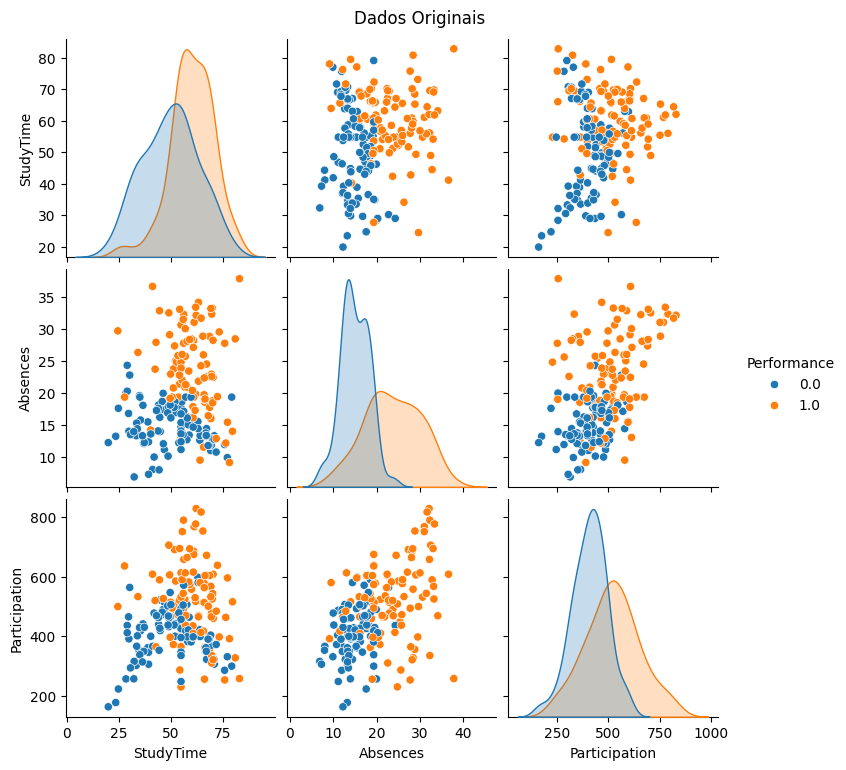

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizando os dados originais
sns.pairplot(df_imputed, hue='Performance', diag_kind='kde')
plt.suptitle("Dados Originais", y=1.02)
plt.show()


Após Min-Max Scaling

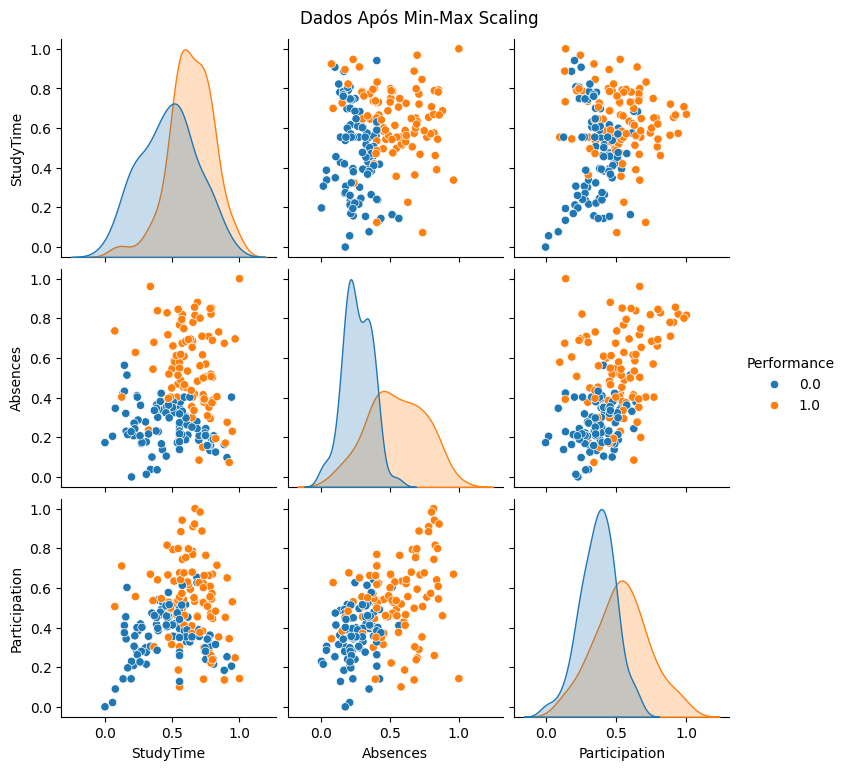

In [12]:
sns.pairplot(df_minmax, hue='Performance', diag_kind='kde')
plt.suptitle("Dados Após Min-Max Scaling", y=1.02)
plt.show()


Após Standard Scaling

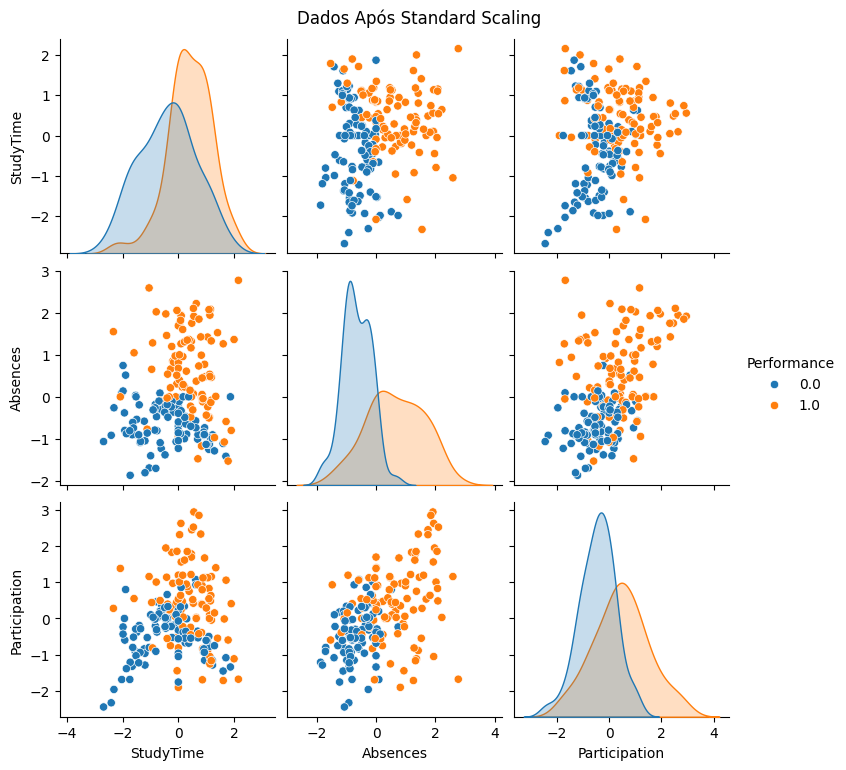

In [13]:
sns.pairplot(df_standard, hue='Performance', diag_kind='kde')
plt.suptitle("Dados Após Standard Scaling", y=1.02)
plt.show()


Após Normalização Logarítmica

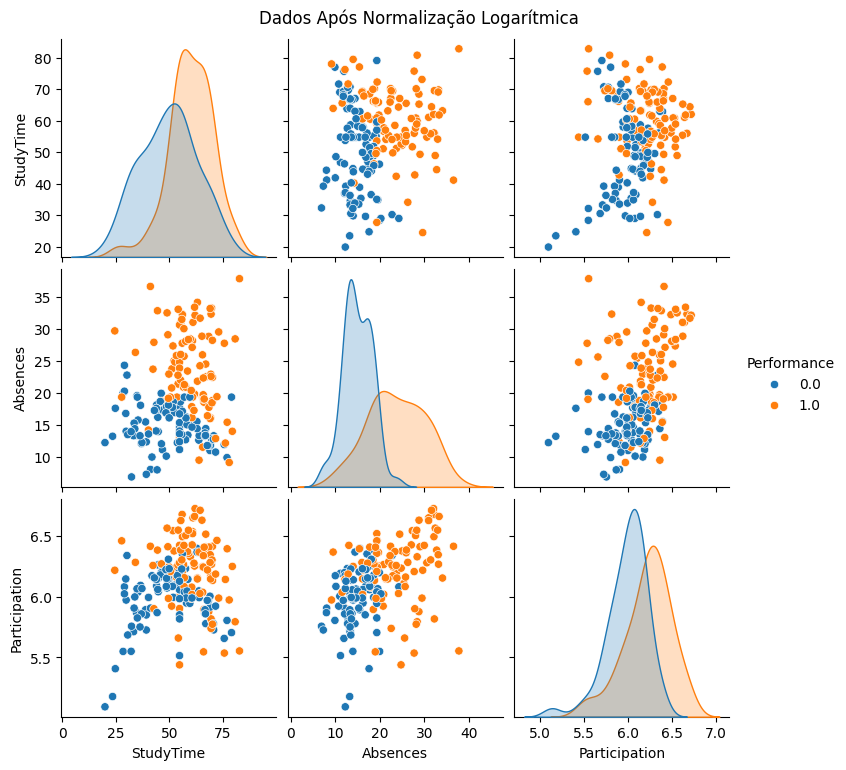

In [14]:
sns.pairplot(df_log, hue='Performance', diag_kind='kde')
plt.suptitle("Dados Após Normalização Logarítmica", y=1.02)
plt.show()

Após Whiten

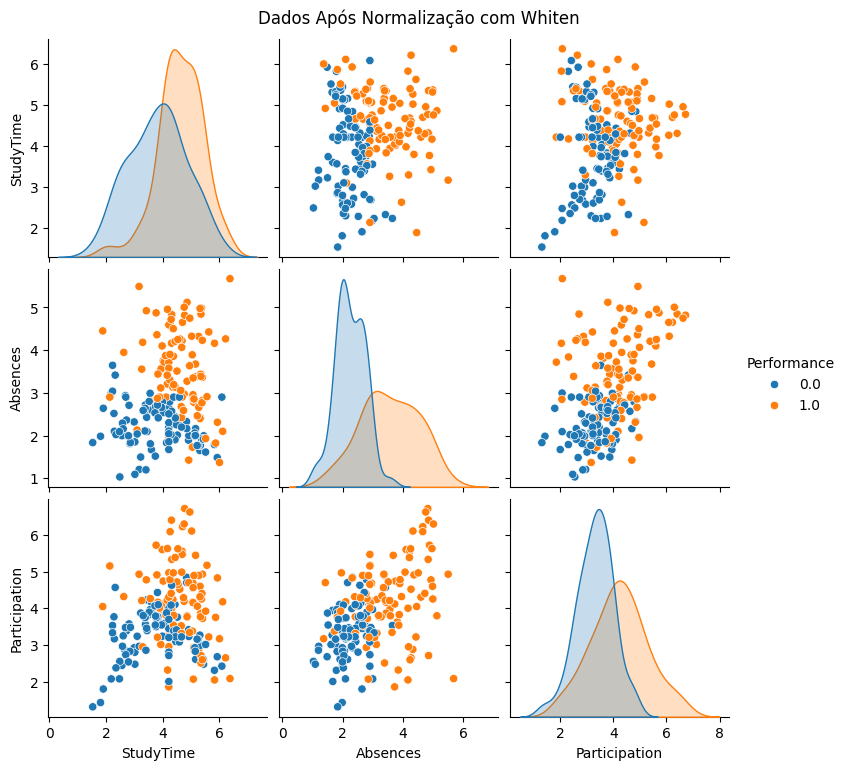

In [15]:
sns.pairplot(df_whiten, hue='Performance', diag_kind='kde')
plt.suptitle("Dados Após Normalização com Whiten", y=1.02)
plt.show()